# 01.02 rootfinding : fixed point iteration

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [ ]:
if True: # settings for the people
  from itertools import count
  import matplotlib.animation
  import matplotlib.pyplot as plt
  import numpy as np
  import scipy as sp
  from tabulate import tabulate
  import textwrap

###### fpi

In [ ]:
# fpi, basic

def fpi(g,x,tol=1e-8,max_iter=100):
  count = 0
  gx = g(x)
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)
    count += 1
  return x


In [ ]:
# fpi, expanded for lecture

def fpi_expanded(g,x,tol=1e-8,max_iter=100,worksheet=False):

  count = 0
  if worksheet:
    data = []

  gx = g(x)
  if worksheet:
    data.append([count,x])
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)

    count += 1
    if worksheet:
      data.append([count,x])
  if worksheet:
    return data
  else:
    return x


###### code, images in order of appearance

In [ ]:
def img_convergence(show="both"):
  """
  show : "plot" animation, "data" (as table), "both"
  """

  # prob-def
  g1 = lambda x: -1.5*x + 2.5
  g2 = lambda x: -0.5*x + 1.5
  ab = (0,2)
  h = 0.1
  h_plot = h/10

  # plot, cfg
  if show == "plot" or show == "both":
    plt.close("all")
    fig,axs = plt.subplots(1,2,figsize=(10,5))

  ws_all = []
  x0 = .8
  # prob-def, generalized
  for ig,(g,s_title,s_label) in enumerate(zip([g1,g2],\
      ["linear divergence","linear convergence"],\
      ["$g_1(x) = -\\frac{3}{2}x + \\frac{5}{2}$","$g_2(x) = -\\frac{1}{2}x + \\frac{3}{2}$"])):

    # calc
    ws = fpi_expanded(g,x0,max_iter=25,worksheet=True)
    ws_all.append(ws)

    if show == "plot" or show =="both": # output plot
      # g(x)
      s_grey = "0.5"
      axs[ig].plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
      xs_plot = np.arange(ab[0]-h,ab[1]+h+h_plot,h_plot)
      gs_plot = g(xs_plot)
      axs[ig].plot(xs_plot,gs_plot,label=s_label,c=s_grey)

      # fpi
      s_blue = "C00"
      xs = []; ys = []
      imax = min(len(ws),5) # 4 points
      for i in range(1,imax):
        xs.append(ws[i-1][1])
        ys.append(ws[i][1])
      axs[ig].scatter(xs,ys,c=s_blue,marker="*")

      # fpi vs x=y diagonal
      y0 = 0
      for x,y in zip(xs,ys):
        if y0 == 0:
          axs[ig].plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        else:
          axs[ig].plot([x,x],[y0,y],c=s_blue,alpha=0.5)
        axs[ig].arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
        y0 = y

      # plot, style
      axs[ig].set_title(s_title)
      axs[ig].grid()
      axs[ig].legend()

  if show == "plot" or show =="both":
    # plot, show
    plt.show()

  if show == "data" or show == "both": # output table
    ws_all = [cols12 + [cols13[1]] for cols12,cols13 in zip(ws_all[0],ws_all[1])]
    s_ifmt = "03d"
    if np.max(np.absolute(ws_all)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    if show == "data":
      print(s_title,"\n")
    else:
      print()
    if len(ws_all) > 10:
      print(tabulate(ws_all[0:6][:],headers=["i","r,dvg","r,cvg"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(ws_all[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(ws_all,headers=["i","r,dvg","r,cvg"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


###### code, examples

In [ ]:
# example 01-1, g(x) = 1 - x^3

def eg_01a(showData=True,showPlot=True):

  # prob-def
  g1 = lambda x: 1 - pow(x,3)
  ab = (0,1)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g1
  s_title = f"example 01-1"
  s_label = f"$g_1(x) = 1 - x^3$"

  # prob-def, runtime
  # calc
  ws = fpi_expanded(g,np.mean(ab),max_iter=12,worksheet=True)

  if showPlot: # output plot
    # plot, cofg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h+h_plot,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),5)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 = 0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    # plot, style
    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    # plot, show
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print(f"\nmodel diverges.\n")
    if len(ws) > 10:
      print(tabulate(ws[0:6][:],headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(ws[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(ws,headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=sf,tablefmt="github"))


In [ ]:
# example 01-2, g(x) = cbrt(1 - x)

def eg_01b(showData=True,showPlot=True):

  # prob-def
  g2 = lambda x: pow(1 - x,1/3)
  ab = (0,1)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g2
  s_title = f"example 01-2"
  s_label = "$g_2(x) = (1 - x)^{\\frac{1}{3}}$"

  # prob-def, runtime
  # calc
  ws = fpi_expanded(g,np.mean(ab),worksheet=True)

  if showPlot: # output plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h_plot/2,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),5)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 = 0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    # plot, style
    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    # plot, show
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print(f"\nmodel converges.\n")
    if len(ws) > 10:
      print(tabulate(ws[0:6][:],headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(ws[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(ws,headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


In [ ]:
# example 01-3, g(x) = [1+2x^3] / [1+3x^2]]

def eg_01c(showData=True,showPlot=True):

  # prob-def
  g3 = lambda x: (1 + 2*pow(x,3))/(1 + 3*pow(x,2))
  ab = (0,1)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g3
  s_title = f"example 01-3"
  s_label = "$g_3(x) = \\frac{1+2x^3}{1+3x^2}$"

  # prob-def, run-time
  # calc
  ws = fpi_expanded(g,np.mean(ab),worksheet=True)

  if showPlot: # output plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h+h_plot,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),5)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 = 0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    # plot, style
    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    # plot, show
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print(f"\nmodel converges really fast.\n")
    if len(ws) > 10:
      print(tabulate(ws[0:6][:],headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(ws[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(ws,headers=["i","x[i]"],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


In [ ]:
# example 04, g(x) = x + cosx - sinx

def eg_04(showData=True,showPlot=True):

  # prob-def
  g4 = lambda x: x + np.cos(x) - np.sin(x)
  ab = (0,1)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g4
  s_title = f"example 04"
  s_label = "$g_4(x) = x + cos\\, x - sin\\, x$"

  # prob-def, runtime
  x0 = 0; r = np.pi/4
  # calc
  ws = fpi_expanded(g,x0,worksheet=True)

  # exxing types
  we = []; e0 = 0
  for w in ws:
    ei = abs(w[1]-r)
    if e0 != 0:
      ed = ei/e0
    else:
      ed = None
    e0 = ei
    we.append([w[0],w[1],ei,ed])

  if showPlot: # output plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h_plot/2,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),5)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 = 0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    # plot, style
    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    # plot, show
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print() # f"\n{s_title}. x0 = {x0}.\n")
    if len(we) > 10:
      print(tabulate(we[0:6][:],headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(we[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(we,headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))

In [ ]:
# example 05, g(x) = 2.8x - x^2 # repurposes example 04

def eg_05(showData=True,showPlot=True):

  # prob-def
  g5 = lambda x: 2.8*x - pow(x,2)
  ab = (0,2)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g5
  s_title = f"example 05"
  s_label = "$g_5(x) = 2.8\\,x - x^2$"

  # prob-def, runtime
  x0 = 0.1; r = 1.8; e0 = 0 # root 2
  # calc
  ws = fpi_expanded(g,x0,worksheet=True)

  # exxing types
  we = []; e0 = 0
  for w in ws:
    ei = abs(w[1]-r)
    if e0 != 0:
      ed = ei/e0
    else:
      ed = None
    e0 = ei
    we.append([w[0],w[1],ei,ed])

  if showPlot: # output plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h_plot/2,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),10)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 =0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print() # f"\n{s_title}. x0 = {x0}.\n")
    if len(we) > 10:
      print(tabulate(we[0:6][:],headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(we[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(we,headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))

In [ ]:
# example 06, g(x) = [x + 2/x]/2 # repurposes example 04

def eg_06(showData=True,showPlot=True):

  # prob-def
  g6 = lambda x: (x + 2/x)/2
  ab = (0.8,1.6)
  h = 0.1
  h_plot = h/10

  # prob-def, generalized
  g = g6
  s_title = f"example 06"
  s_label = "$g_6(x) = \\frac{(x + \\frac{2}{x})}{2}$"

  # prob-def, runtime
  x0 = 1; r = np.sqrt(2); e0 = 0
  # calc
  ws = fpi_expanded(g,x0,worksheet=True)

  # exxing types
  we = []; e0 = 0
  for w in ws:
    ei = abs(w[1]-r)
    if e0 != 0:
      ed = ei/e0
    else:
      ed = None
    e0 = ei
    we.append([w[0],w[1],ei,ed])

  if showPlot: # output plot
    # plot, cfg
    plt.close("all")

    # g(x)
    s_grey = "0.5"
    plt.plot([ab[0]-h,ab[1]+h],[ab[0]-h,ab[1]+h],ls=":",c=s_grey)
    xs_plot = np.arange(ab[0]-h,ab[1]+h_plot/2,h_plot)
    gs_plot = g(xs_plot)
    plt.plot(xs_plot,gs_plot,label=s_label,c=s_grey)

    # fpi
    s_blue = "C00"
    xs = []; ys = []
    imax = min(len(ws),10)
    for i in range(1,imax):
      xs.append(ws[i-1][1])
      ys.append(ws[i][1])
    plt.scatter(xs,ys,c=s_blue,marker="*")

    # fpi vs x=y diagonal
    y0 = 0
    for x,y in zip(xs,ys):
      if y0 == 0:
        plt.plot([x,x],[y0,y],label="fpi",c=s_blue,alpha=0.5)
        plt.text(x-h/5,y0-h*.6,f"$x_0 = {x}$")
      else:
        plt.plot([x,x],[y0,y],c=s_blue,alpha=0.5)
      plt.arrow(x,y,y-x,0,color=s_blue,alpha=0.5,length_includes_head=True,head_width=0.025)
      y0 = y

    plt.title(f"{s_title}, {s_label}")
    plt.grid()
    plt.legend()
    plt.show()

  if showData: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,1]) >= 10:
      s_ffmt = ".8e"
    else:
      s_ffmt = ".8f"
    print() # f"\n{s_title}. x0 = {x0}.\n")
    if len(we) > 10:
      print(tabulate(we[0:6][:],headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
      print(tabulate(we[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))
    else:
      print(tabulate(we,headers=["i","x[i]","e[i]",'"/e[i-1]'],intfmt=s_ifmt,floatfmt=s_ffmt,tablefmt="github"))


## 1 fixed point of a function

##### definition 04

real number $r$ is a <b>fixed point</b> of function $g$ if $g(r) = r$.

### form

1. restate problem $f(x) = 0$ into form $g(x) = x$

\begin{align}
  &f(x) = cos\, x - x = 0 \quad\Rightarrow\quad& &g(x) = cos\, x &\overset{g(x)=x}{\quad\Longrightarrow\quad} &r \approx 0.7390851332; \\
  &f(x) = x^3 - x = 0 \quad\Rightarrow\quad& &g(x) = x^3 &\quad\Longrightarrow\quad &r = -1,0,1.
\end{align}

2. then iterate from initial guess $x_0$.

##### algorithm <b>fixed point interation</b>

```
x[0] = initial guess
x[i+1] = g(x[i]) for i = 0,1,2,...
```
```
x[1] = g(x[0])
x[2] = g(x[1])
x[3] = g(x[2])
...
```

## 2 geometry

fpi may not converge! but if $g$ is continuous and $x_i$ converge to $r$, then $r$ is a fixed point.

$$g(r) = g\left( \lim_{i\rightarrow\infty} x_i \right) = \lim_{i\rightarrow\infty}\, g(x_i) = \lim_{i\rightarrow\infty}\, x_{i+1} = r.$$

##### example 01, revisited

$x^3 + x - 1 = 0$.

1. $\quad x = \overbrace{1 - x^3}^{g_1(x)} \quad\Rightarrow\quad g_1(x) = x. \enspace\checkmark$

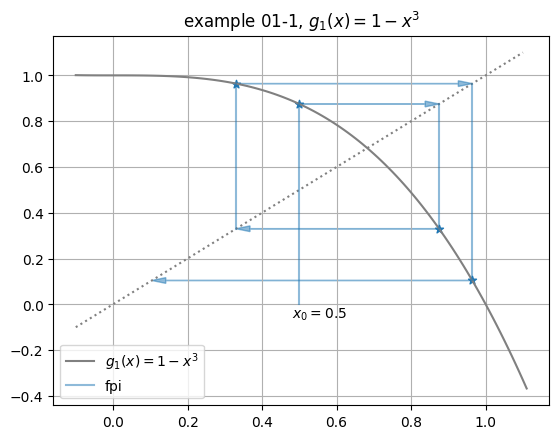


model diverges.

|   i |       x[i] |
|-----|------------|
| 000 | 0.50000000 |
| 001 | 0.87500000 |
| 002 | 0.33007812 |
| 003 | 0.96403747 |
| 004 | 0.10405419 |
| 005 | 0.99887338 |
|-----|------------|
| 008 | 0.00000012 |
| 009 | 1.00000000 |
| 010 | 0.00000000 |
| 011 | 1.00000000 |
| 012 | 0.00000000 |


In [ ]:
eg_01a() # example 01-1

2. $\quad x = (x^3)^{\tfrac{1}{3}} = \overbrace{(1 - x)^{\tfrac{1}{3}}}^{g_2(x)} \quad\Rightarrow\quad g_2(x) = x. \enspace\checkmark$

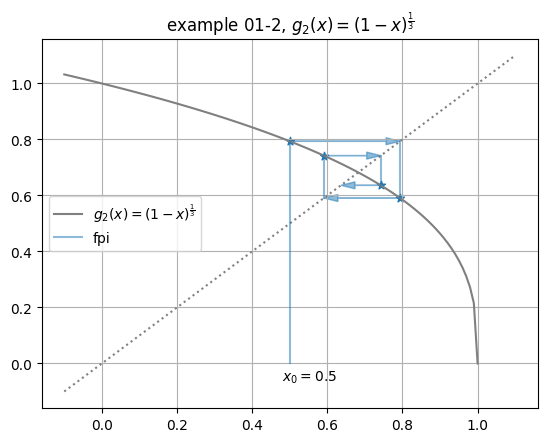


model converges.

|   i |       x[i] |
|-----|------------|
| 000 | 0.50000000 |
| 001 | 0.79370053 |
| 002 | 0.59088011 |
| 003 | 0.74236393 |
| 004 | 0.63631020 |
| 005 | 0.71380081 |
|-----|------------|
| 048 | 0.68232779 |
| 049 | 0.68232782 |
| 050 | 0.68232779 |
| 051 | 0.68232781 |
| 052 | 0.68232780 |


In [ ]:
eg_01b() # example 01-2

3. $g_3(x) = \tfrac{1+2x^3}{1+3x^2}$ bc

\begin{align}
  f(x) = x^3+x-1 &= 0 \\
  \\
  x^3 + x \color{blue}{- 1} \color{darkorange}{+ 2x^3} &= 0 \color{darkorange}{+ 2x^3} \\
  \\
  (3x^2 + 1)\cdot x &= \color{blue}{+1} + 2x^3 \quad\Rightarrow\quad x = \underbrace{\tfrac{1+2x^3}{1+3x^2}}_{g_3(x)}. \enspace\checkmark
\end{align}

ie, add $2x^3$ to each side of $f(x)$ to reduce its order. for why "$2$" in "$2x^3$", consider what $g(x)$ is wrt $x$.

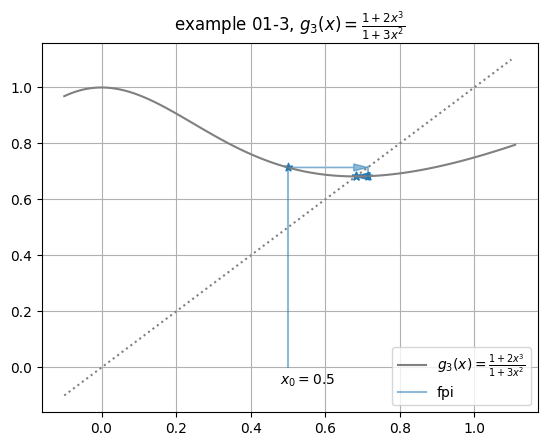


model converges really fast.

|   i |       x[i] |
|-----|------------|
| 000 | 0.50000000 |
| 001 | 0.71428571 |
| 002 | 0.68317972 |
| 003 | 0.68232842 |
| 004 | 0.68232780 |


In [ ]:
eg_01c() # example 01-3

## 3 linear convergence

consider linear functions, $g_1(x) = -\frac{3}{2}x + \frac{5}{2}$ and $g_2(x) = -\frac{1}{2}x + \frac{3}{2}$. while both have fixed point of $r = 1$, $|g_1'(1)| = \color{blue}{|-\frac{3}{2}| > 1}$, $|g_2'(1)| = \color{darkorange}{|-\frac{1}{2}| < 1}$.

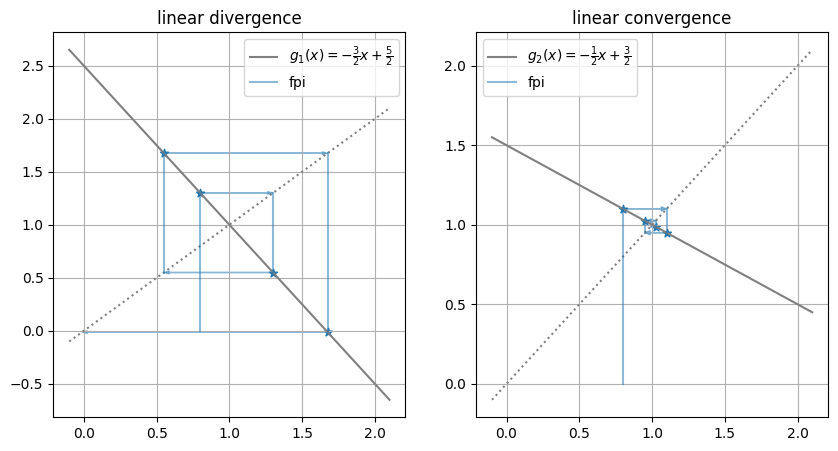


|   i |           r,dvg |          r,cvg |
|-----|-----------------|----------------|
| 000 |  8.00000000e-01 | 8.00000000e-01 |
| 001 |  1.30000000e+00 | 1.10000000e+00 |
| 002 |  5.50000000e-01 | 9.50000000e-01 |
| 003 |  1.67500000e+00 | 1.02500000e+00 |
| 004 | -1.25000000e-02 | 9.87500000e-01 |
| 005 |  2.51875000e+00 | 1.00625000e+00 |
|-----|-----------------|----------------|
| 021 |  9.98577019e+02 | 1.00000010e+00 |
| 022 | -1.49536553e+03 | 9.99999952e-01 |
| 023 |  2.24554829e+03 | 1.00000002e+00 |
| 024 | -3.36582244e+03 | 9.99999988e-01 |
| 025 |  5.05123366e+03 | 1.00000001e+00 |


In [ ]:
img_convergence()

\begin{align}
  g_1(x) &= -\tfrac{3}{2}(x-1) + 1 \\
  \Rightarrow g_1(x)-1 &= -\tfrac{3}{2}(x-1) \\
  \Rightarrow x_{i+1} - 1 &= \color{blue}{-\tfrac{3}{2}}(x_i-1) \\
  e_i &= |x_i - r| \Rightarrow e_{i+1} = \color{blue}{\tfrac{3}{2}}e_i; \\
  \\
  g_2(x) &= -\tfrac{1}{2}(x-1) + 1 \\
  \Rightarrow g_2(x)-1 &= -\tfrac{1}{2}(x-1) \\
  \Rightarrow x_{i+1} - 1 &= \color{darkorange}{-\tfrac{1}{2}}(x_i-1) \\
  e_i &= |x_i - r| \Rightarrow e_{i+1} = \color{darkorange}{\tfrac{1}{2}}e_i.
\end{align}


##### definition 05

let $e_i$ denote error at step $i$ of an iterative method. if

$$\lim_{i\rightarrow\infty}\frac{e_{i+1}}{e_i} = S < 1,$$

the method obeys <b>linear convergence</b> with rate $S$.

##### theorem 06

assume $g$ is continuously differentiable, $g(r) = r$ and $S=|g'(r)|<1$. then FPI converges linearly with rate $S$ to $r$ for guesses $x_0$ sufficiently close to $r$.

###### proof


let $x_i$ denote iterate at step $i$. by mean value theorem (MVT), there exists number $c_i$ between $x_i$ and $r$ such that

\begin{align}
  x_{i+1} - r &= g'(c_i)(x_i - r) \\
  \\
  &\quad\Downarrow \quad x_{i+1} = g(x_i), r = g(r), e_i = |x_i - r|\\
  \\
  e_{i+1} &= |g'(c_i)|e_i.
\end{align}

if $S = |g'(r)| < 1$, then by continuity of $g'$ there is small neighborhood around $r$ for which $S<|g'(x)|<(S+1)/2<1$. if $x_i$ in this neighborhood, then $c_i$ is as well. so

$$e_{i+1} \le \frac{S+1}{2}e_i.$$

ie, error decreases by at least $(S+1)/2$ on current and each future step. ie, as $\lim_{i\rightarrow\infty} x_i = r$,

$$\lim_{i\rightarrow\infty} \frac{e_{i+1}}{e_i} = \lim_{i\rightarrow\infty} |g'(c_i)| = |g'(r)| = S. \enspace\blacksquare$$

##### usw

ie, the approximate error relationship

$$e_{i+1} \approx Se_i$$

holds in the limit as convergence is approached where $S = |g'(x^*)|$.

##### definition 07

an iterative method is <b>locally convergent</b> to $r$ if method converges to $r$ for initial guesses sufficiently close to $r$.

ie, the $g(x)$ is locally convergent to root $r$ if there exists some neighborhood $(r-\epsilon,r+\epsilon)$ where $\epsilon > 0$ such that all initial guesses in that neighborhood converge. specifically, theorem 06 states that fpi converges locally if $|g'(r)| < 1.$

##### example 03

explain why $g(x) = cos\, x$ converges.

bc $g'(r) = -sin\,r \approx -sin\, 0.74 \approx -0.96 \Rightarrow |g'(r)| < 0. \enspace\checkmark$

##### example 04

find root of $cos\, x = sin\, x$ using FPI.

$\Rightarrow g(x) = x + cos\, x - sin\, x = x.$

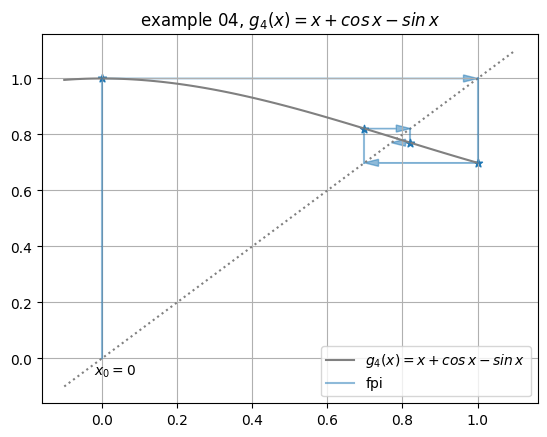


|   i |       x[i] |       e[i] |   "/e[i-1] |
|-----|------------|------------|------------|
| 000 | 0.00000000 | 0.78539816 |            |
| 001 | 1.00000000 | 0.21460184 | 0.27323954 |
| 002 | 0.69883132 | 0.08656684 | 0.40338351 |
| 003 | 0.82110248 | 0.03570431 | 0.41244791 |
| 004 | 0.77061968 | 0.01477848 | 0.41391311 |
| 005 | 0.79151885 | 0.00612069 | 0.41416208 |
|-----|------------|------------|------------|
| 017 | 0.78539832 | 0.00000016 | 0.41421356 |
| 018 | 0.78539810 | 0.00000006 | 0.41421356 |
| 019 | 0.78539819 | 0.00000003 | 0.41421356 |
| 020 | 0.78539815 | 0.00000001 | 0.41421356 |
| 021 | 0.78539817 | 0.00000000 | 0.41421358 |


In [ ]:
eg_04()

that last table column explains the previous column. ie, the last column displays the ratio by which error $e_i$ decreases:

$$e_i \approx 0.414\,e_{i-1}.$$

theorem 06 implies

$$S = |g'(r)| = |1 - sin\,r - cos\, r| = |1 - \frac{\sqrt{2}}{2} - \frac{\sqrt{2}}{2}| = |1 - \sqrt{2}| \approx 0.414. \enspace\checkmark$$

##### example 05

find fixed points of $g(x) = 2.8\, x - x^2$.

by various non-computational shortcuts, roots $r = 0, 1.8$.

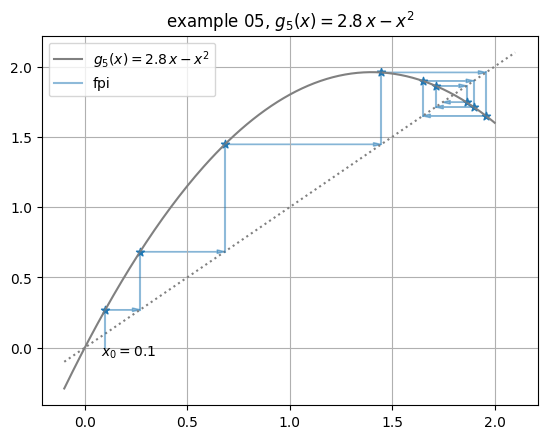


|   i |       x[i] |       e[i] |   "/e[i-1] |
|-----|------------|------------|------------|
| 000 | 0.10000000 | 1.70000000 |            |
| 001 | 0.27000000 | 1.53000000 | 0.90000000 |
| 002 | 0.68310000 | 1.11690000 | 0.73000000 |
| 003 | 1.44605439 | 0.35394561 | 0.31690000 |
| 004 | 1.95787899 | 0.15787899 | 0.44605439 |
| 005 | 1.64877103 | 0.15122897 | 0.95787899 |
|-----|------------|------------|------------|
| 077 | 1.79999999 | 0.00000001 | 0.80000002 |
| 078 | 1.80000001 | 0.00000001 | 0.79999995 |
| 079 | 1.79999999 | 0.00000001 | 0.80000003 |
| 080 | 1.80000001 | 0.00000001 | 0.79999998 |
| 081 | 1.79999999 | 0.00000001 | 0.80000010 |


In [ ]:
eg_05() # repurposes example 04

obviously the intersection of $g_5(x)$ and $y=x$ are the roots; however, note that root $r=1.8$ is found from $x_0 = 0.1$ despite its closer proximity to root $r=0$. thats bc $g'(1.8) = -0.8$ vs $g'(0) = 2.8$. 😶

##### example 06: the babylonians

calculate $\sqrt{2}$ using FPI.

$$x_{i+1} = \frac{x_i + \tfrac{2}{x+i}}{2}.$$

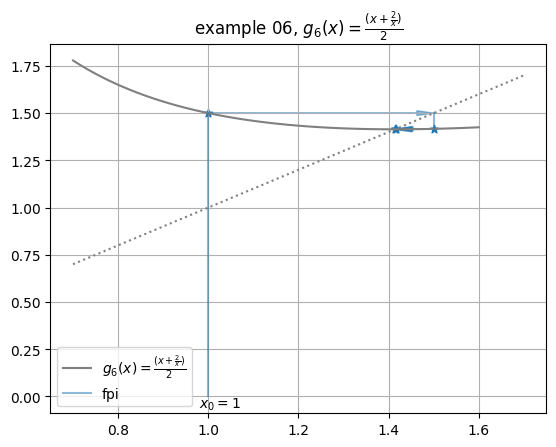


|   i |       x[i] |       e[i] |   "/e[i-1] |
|-----|------------|------------|------------|
| 000 | 1.00000000 | 0.41421356 |            |
| 001 | 1.50000000 | 0.08578644 | 0.20710678 |
| 002 | 1.41666667 | 0.00245310 | 0.02859548 |
| 003 | 1.41421569 | 0.00000212 | 0.00086580 |
| 004 | 1.41421356 | 0.00000000 | 0.00000075 |


In [ ]:
eg_06() # repurposes example 04

## 4 stopping criteria

bisection is predictable and guaranteed to converge; FPI might converge locally, linearly and quickly. or it might not, lol. instead of estimating steps required for a given error, specify a stopping criteria for FPI. eg, for tolerance $TOL$,

\begin{align}
  \Delta x = |x_{i+1}-x_i| &< TOL \sim \epsilon \\\\
  \frac{|x_{i+1}-x_i|}{|x_{i+1}|} &< TOL, \quad r \text{ not near }0 \\\\
  \frac{|x_{i+1}-x_i|}{\text{max}(|x_{i+1}|,\theta)} &< TOL, \quad\theta > 0\text{ and } r \text{ near }0.
\end{align}

## resources

meh. youre good.